In [37]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#load the data set from local directory
df_immigrants = pd.read_csv('C:/Users/HP/Downloads/US Immigration Statistics (Ver 1.7.23).csv', index_col = 'Year')

#view sample data of dataset
df_immigrants.head()

,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
Year,,,,,
1980,"524,295","207,116","910,361","18,013","719,211"
1981,"595,014","159,252","975,780","17,379","823,875"
1982,"533,624","98,096","970,246","15,216","812,572"
1983,"550,052","61,218","1,251,357","19,211","931,600"
1984,"541,811","70,393","1,246,981","18,696","909,833"


In [11]:
# Rename only the first column(because its too long)
df_immigrants = df_immigrants.rename(columns={
    "Immigrants Obtaining Lawful Permanent Resident Status": "Lawful Permanent Residents"
})
print(df_immigrants.columns)

Index(['Lawful Permanent Residents', 'Refugee Arrivals',
       'Noncitizen Apprehensions', 'Noncitizen Removals',
       'Noncitizen Returns'],
      dtype='object')


In [13]:
# Get minimum and maximum values(for my dataset understanding before plot)
min_values = df_immigrants.min()
max_values = df_immigrants.max()

for value in df_immigrants.columns:
    print(f"{value}: Min = {min_values[value]}, Max = {max_values[value]}")


Lawful Permanent Residents: Min = 1,016,518 , Max = 990,553 
Refugee Arrivals: Min =  111,680 , Max = 98,096 
Noncitizen Apprehensions: Min = 1,008,145, Max = 975,780
Noncitizen Removals: Min = 114,432, Max = 89,191
Noncitizen Returns: Min = 1,012,116, Max = 945,294


In [15]:
def plot_immigrant_pie_chart(df_immigrants):
    """
    Plot a pie chart showing the distribution of immigrants across 5 categories
    """
    # Remove comma symbols and convert to numeric values because need to sum it
    df_immigrants_converted = df_immigrants.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
    
    # Calculate the total immigrants for each category for plot pie
    total_immigrants = df_immigrants_converted.sum()
    
    # Create a pie chart plot
    plt.figure(dpi=144)
    plt.pie(total_immigrants, labels=total_immigrants.index, autopct='%1.1f%%', startangle=90)
    # Title
    plt.title('Distribution of Immigrants by Category')
    plt.axis('equal')

    # for save image
    plt.savefig("plot_immigrant_pie_chart.png", dpi=300, bbox_inches='tight')
    
    plt.show()

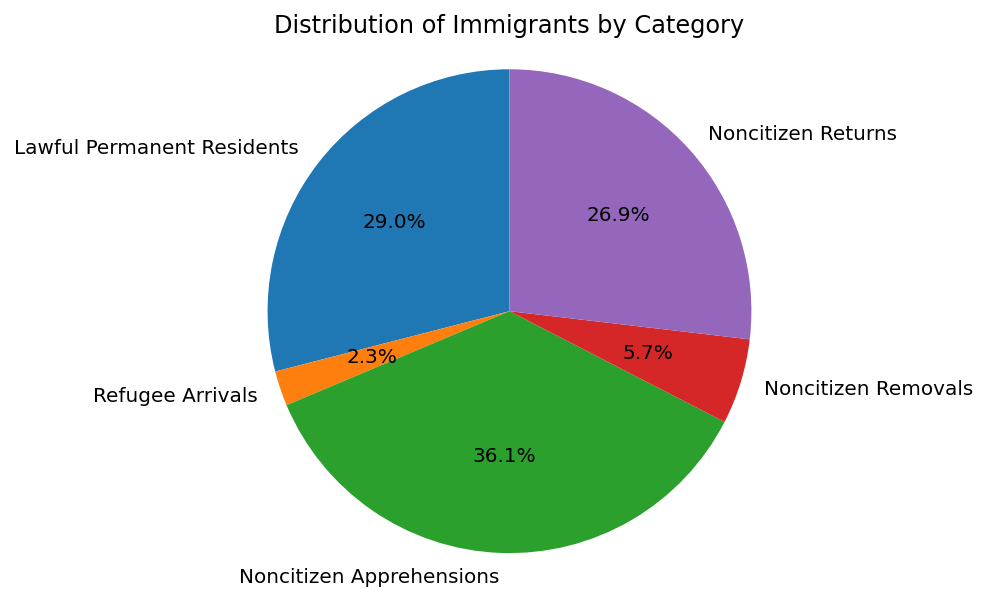

In [17]:
#call the plot_immigrant_pie_chart function
plot_immigrant_pie_chart(df_immigrants)

In [19]:
 # Convert every columns to numeric values
for column in df_immigrants.columns:
    df_immigrants[column] = pd.to_numeric(df_immigrants[column].str.replace(',', ''), errors='coerce')

In [21]:
# Define the whole line plot function
def lineplot(data, title, xlabel=None, ylabel=None):
    ''' 
    Function to create a line plot
    '''
    # sort the dataframe by index (Year)
    data = data.sort_index()

    # Plotting line plot
    plt.figure(dpi=144)
    
    # Adding markers as rounded bullets for better visibility
    data.plot.line(marker='o')

    # Title
    plt.title(title, fontsize=14)

    # Labelling
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    plt.legend(title='Categories',fontsize=10, loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.ticklabel_format(style='plain')
    # Save as PNG image
    plt.savefig("linplot.png", dpi=300, bbox_inches='tight')

    plt.show()


<Figure size 921.6x691.2 with 0 Axes>

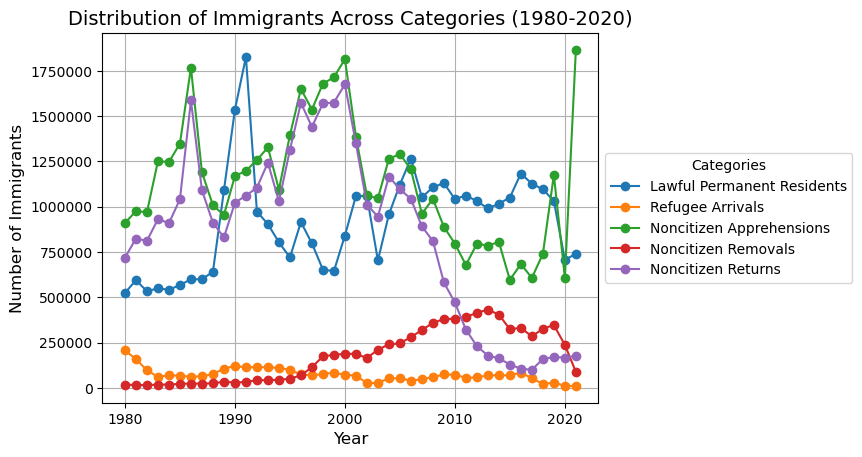

In [23]:
# Call the lineplot function to plot the data
# here we are giving tittle and labels names
lineplot(df_immigrants, "Distribution of Immigrants Across Categories (1980-2020)", "Year", "Number of Immigrants")

In [25]:
# Function to create a line plot for each category
# For better visibility plot  for each category
def lineplot_for_each_category(data):
    ''' 
    Function to create a line plot  for each category
    '''
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[column], marker='o')
        
        # Title
        plt.title(f"{column} (1980-2020)", fontsize=14)
        
        # Labels
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Number of Immigrants", fontsize=12)
        
        plt.grid(True)

        plt.ticklabel_format(style='plain')
        
        # for save image
        plt.savefig("line.png", dpi=300, bbox_inches='tight')
        
        plt.show()


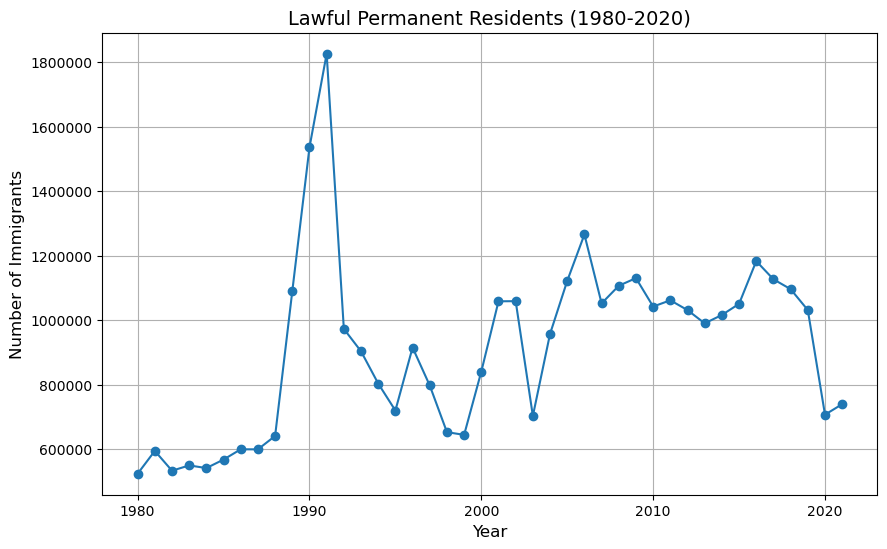

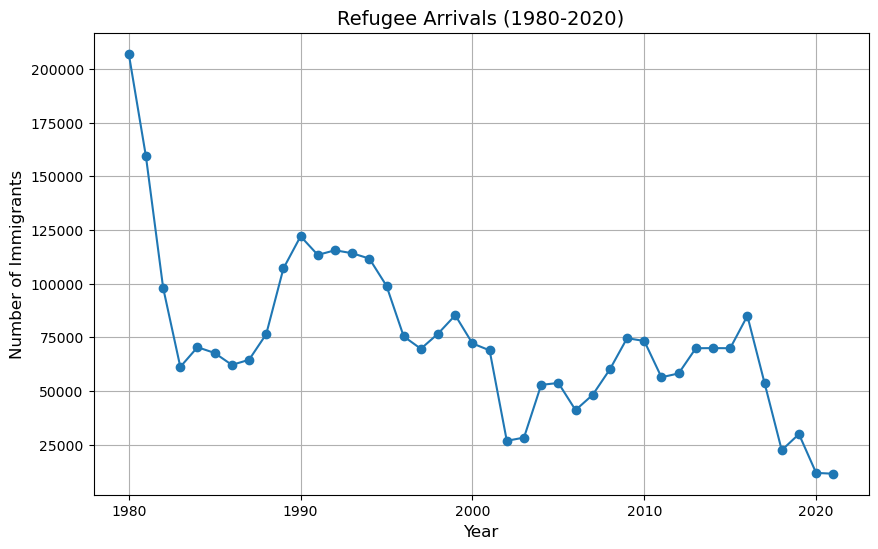

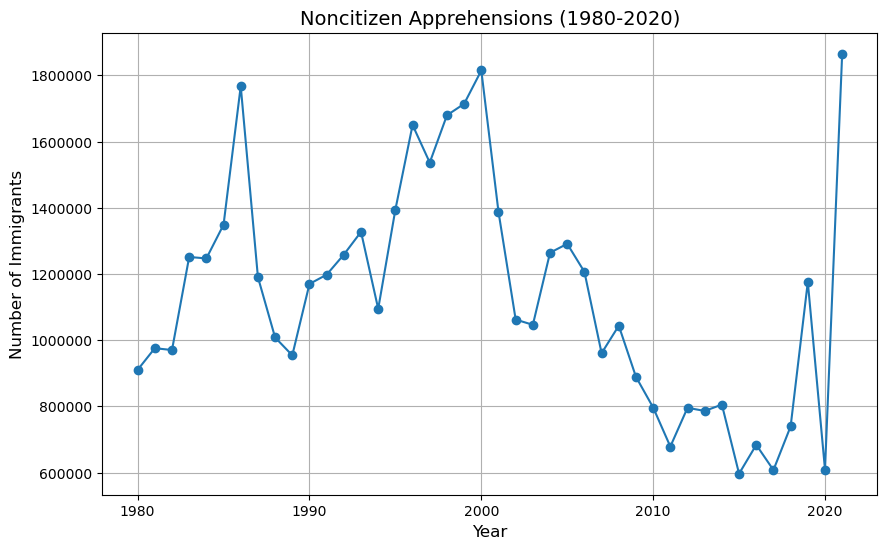

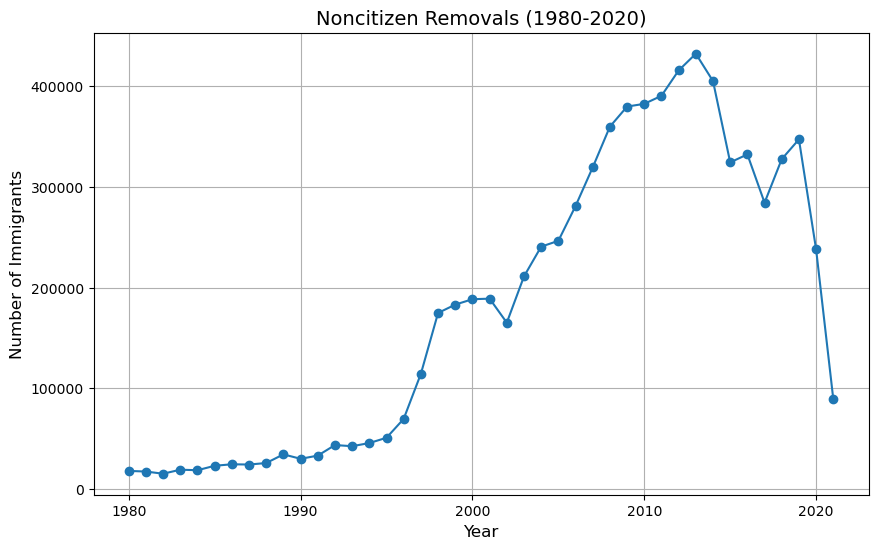

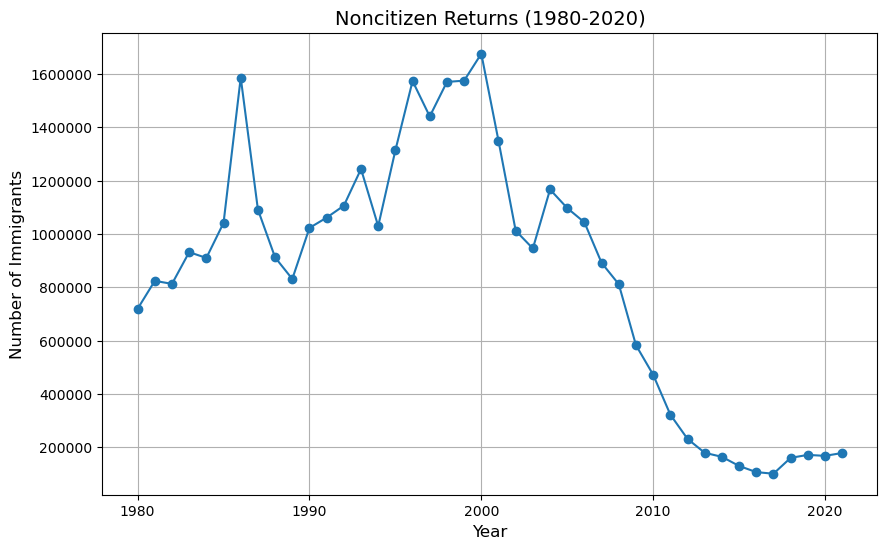

In [27]:
# Call the function lineplot_for_each_category to plot each category
lineplot_for_each_category(df_immigrants)

In [39]:
def plot_correlation_heatmap(df, method):
    """
    Plots correlation heatmap for the given DataFrame using the kendall and pearson method.
    """
    # calculate the correlation matrix
    corr_matrix = df.corr(method=method)
    
    # Create a mask
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8), dpi=144)

    # plot the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, ax=ax)

    # Set the title
    plt.title(f'{method.capitalize()} Correlation of Immigration Data', fontsize=14)
    # Save as PNG image
    plt.savefig("plot_correlation_heatmap.png", dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()


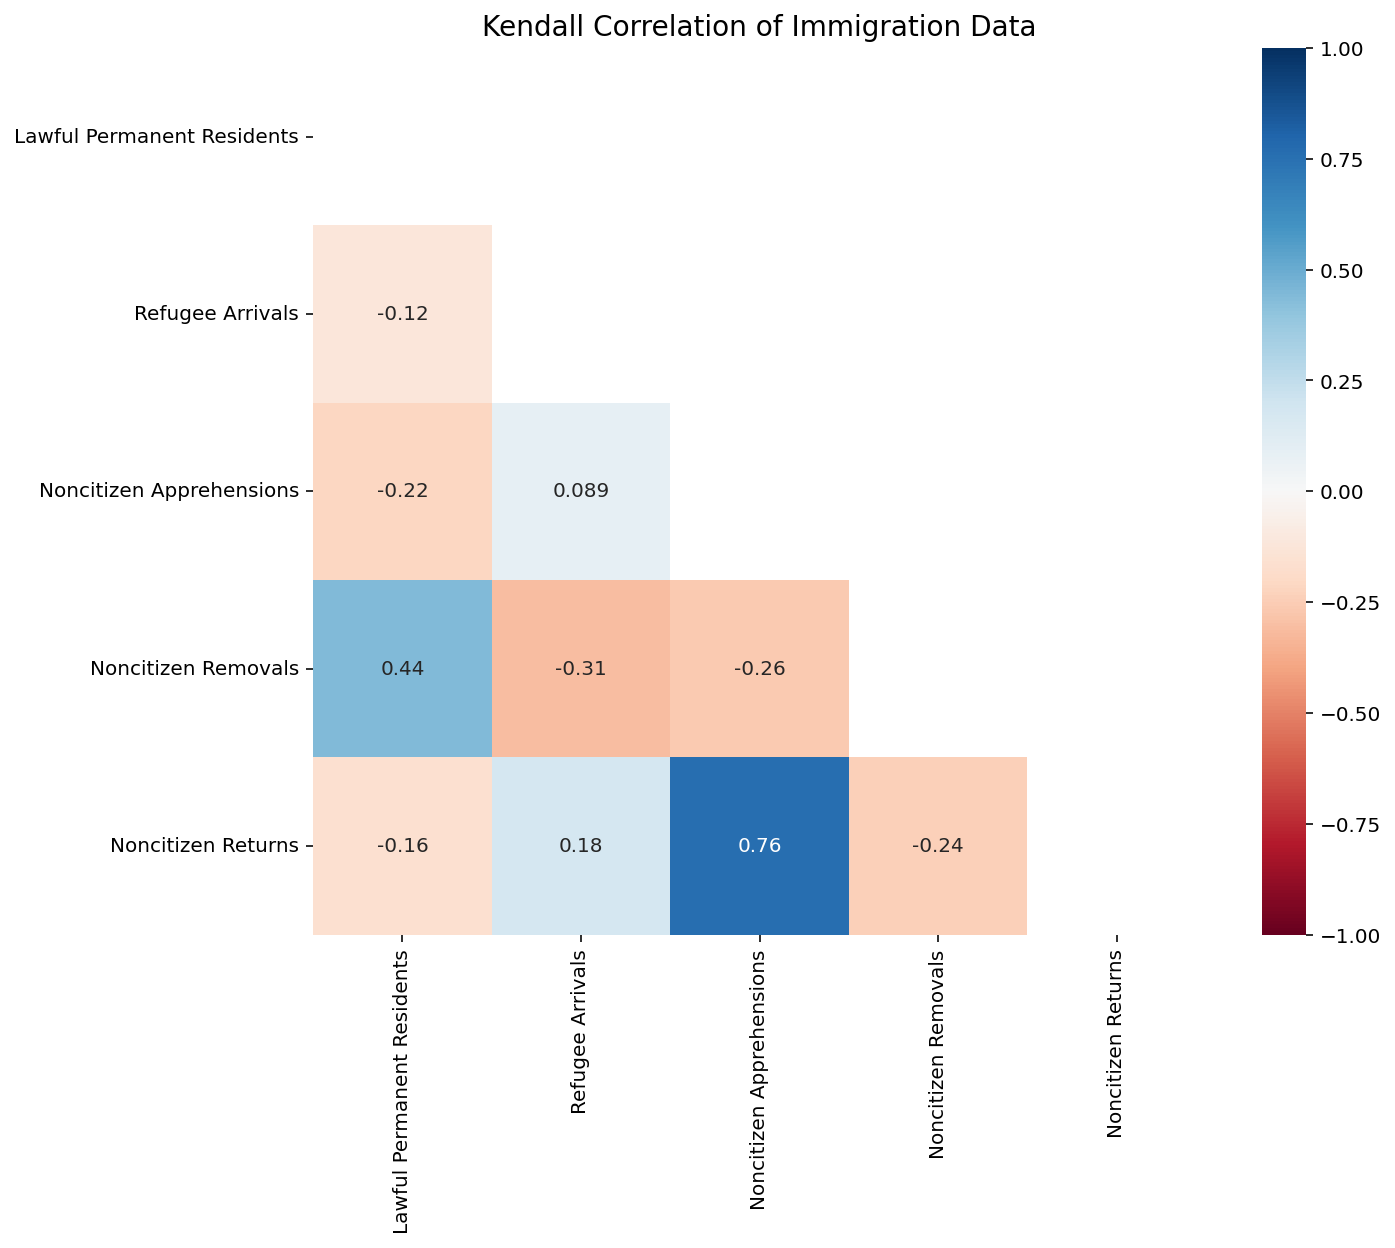

In [41]:
# Call the plot_correlation_heatmap function to plot the correlation heatmap for using kendall method
plot_correlation_heatmap(df_immigrants, 'kendall')

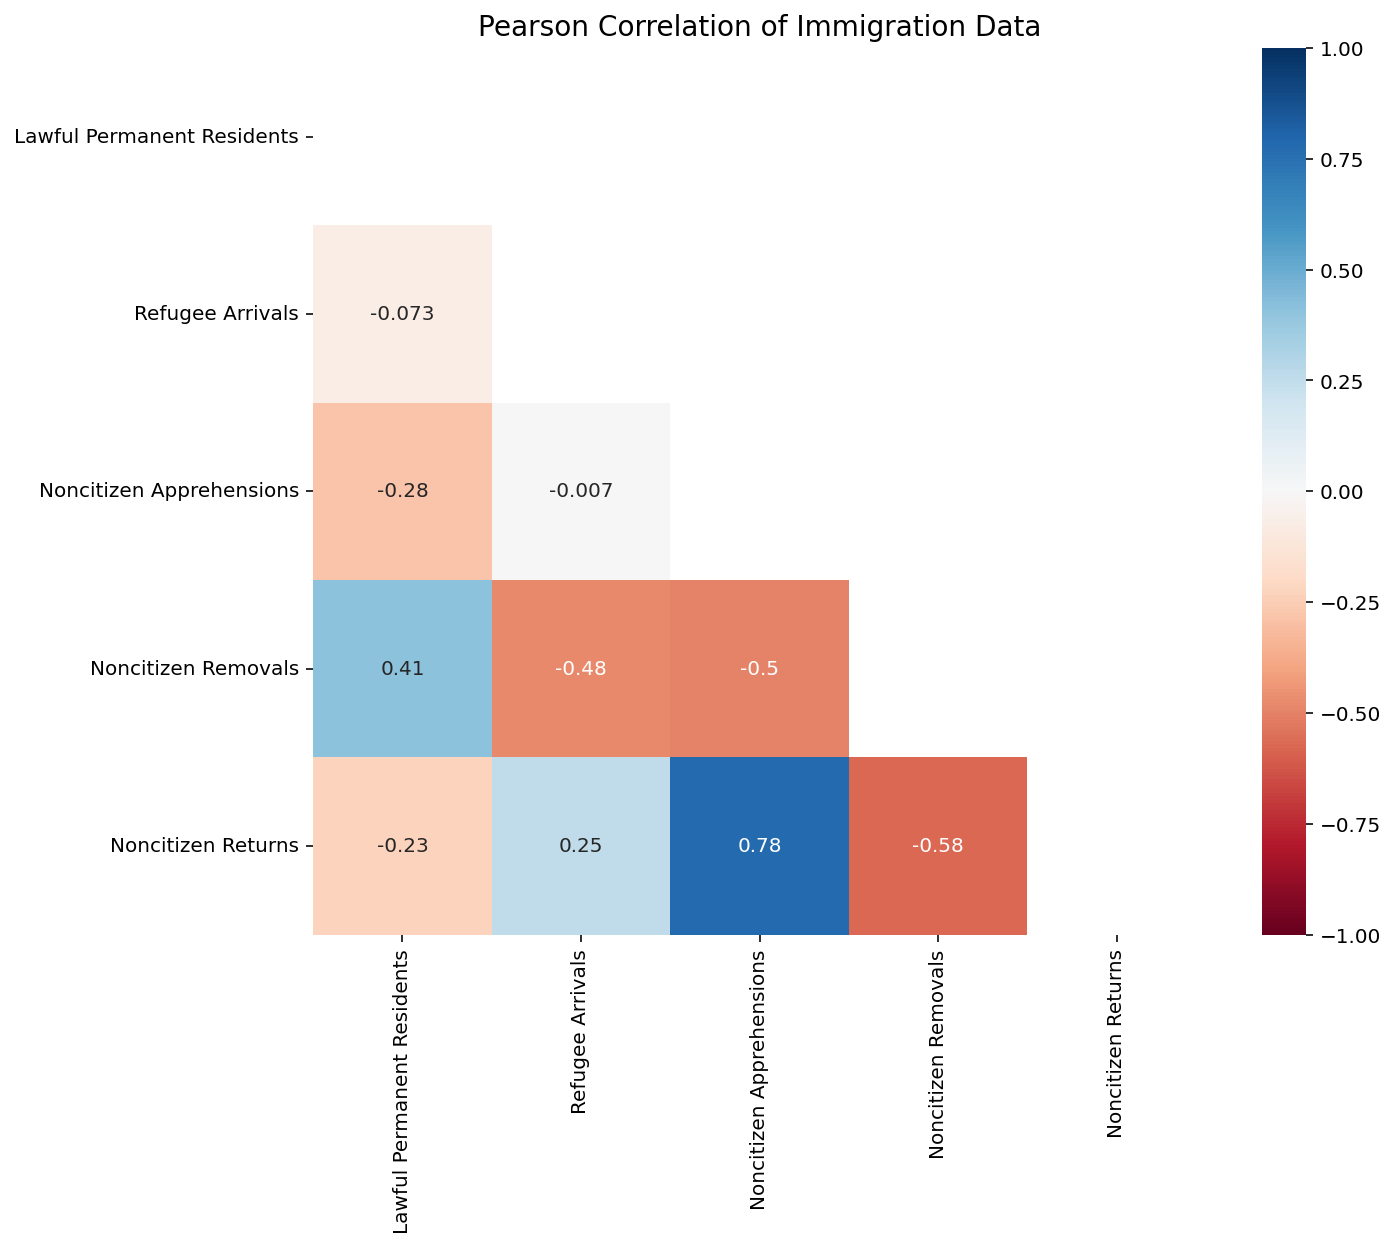

In [43]:
# Call the function to plot the correlation heatmap for your DataFrame using 'pearson'
plot_correlation_heatmap(df_immigrants, 'pearson')